In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor
import math
import cv2
import matplotlib.patches as mpatches

In [147]:
df_data = jb.load('../data/generated/df_newimages_bands_downside.pkl.z')
df_data

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7
0,233,1130,3.195862,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,1.162614,1.094573,0.419775,0.302256,-0.152982,23.382784
1,233,1131,3.273030,0.1199,0.0880,0.0668,0.0457,0.0490,0.0316,0.0283,0.0237,1.171434,1.099318,0.419775,0.316380,-0.153713,23.382784
2,233,1132,3.299687,0.1199,0.0879,0.0666,0.0461,0.0488,0.0324,0.0281,0.0238,1.168473,1.096035,0.421458,0.311940,-0.154246,23.158824
3,233,1133,3.268182,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,1.175411,1.111754,0.421458,0.322339,-0.172881,23.158824
4,233,1134,3.278125,0.1196,0.0884,0.0677,0.0454,0.0489,0.0323,0.0285,0.0238,1.174645,1.104724,0.419585,0.321375,-0.161235,23.607309
5,233,1135,3.294375,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,1.171288,1.110496,0.419585,0.315110,-0.168367,23.607309
6,233,1136,3.353030,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,1.171894,1.105480,0.422963,0.316149,-0.163072,24.852202
7,233,1137,3.381500,0.1196,0.0886,0.0660,0.0451,0.0485,0.0317,0.0296,0.0233,1.177283,1.099970,0.422963,0.325355,-0.152838,24.852202
8,234,1003,2.230000,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,1.149791,1.090009,0.376828,0.286115,-0.133698,28.922021
9,234,1004,2.229857,0.1224,0.0917,0.0734,0.0514,0.0540,0.0336,0.0323,0.0264,1.146938,1.090436,0.387755,0.281621,-0.152276,27.977559


In [151]:
model = jb.load('../data/generated/rf_model.pkl.z')

In [152]:
z = model.predict(df_data.drop(['x','y','z'],axis=1))

In [153]:
df_data['z_pred'] = z

In [169]:
df_result = df_data.drop(['b1','b2','b3','b4','b5','b6','b7','b8','b2b4','b3b4','ndwi15','ndwi24','ndwi53'],axis=1)

In [170]:
df_result['error_abs'] = abs(df_result['z'] - df_result['z_pred'])

In [171]:
df_result['error_dif'] = df_result['z_pred'] - df_result['z']

In [172]:
df_result['z_mean_rd'] = df_result['z'].apply(np.floor)

In [177]:
df_depth = df_result.drop(['x','y','z_pred','z'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','cspm','mean_abs_error','mean_dif_error']
df_depth

,depth_round_down,cspm,mean_abs_error,mean_dif_error
0,1.0,21.609668,0.976408,0.972438
1,2.0,21.421786,0.722759,0.690224
2,3.0,21.433598,0.717637,0.599433
3,4.0,21.207139,0.655946,0.455730
4,5.0,20.116021,0.670006,0.308155
5,6.0,19.595476,0.730252,0.094860
6,7.0,19.221706,0.729849,-0.046492
7,8.0,18.987919,0.815428,-0.072539
8,9.0,18.675887,0.903280,-0.368310
9,10.0,18.671460,1.029864,-0.511922


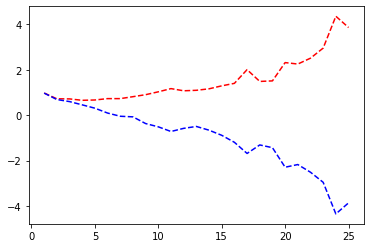

In [178]:
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--', df_depth['depth_round_down'], df_depth['mean_dif_error'], 'b--',)
plt.show()

In [179]:
df_result.describe()

,x,y,z,cspmb7,z_pred,error_abs,error_dif,z_mean_rd
count,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000
mean,1146.106393,645.022450,7.266698,20.042505,7.316534,0.874232,0.049836,6.768341
std,469.596796,409.044537,4.551863,5.411964,4.127996,1.185914,1.472491,4.569380
min,233.000000,1.000000,1.164255,9.348026,1.167598,0.000000,-14.589865,1.000000
25%,784.000000,322.000000,3.491833,16.614589,4.029184,0.140983,-0.392197,3.000000
50%,1034.000000,601.000000,6.290000,18.696860,6.395813,0.461548,0.016520,6.000000
75%,1541.000000,939.000000,9.881563,21.717054,9.544141,1.124532,0.533555,9.000000
max,2296.000000,1638.000000,25.792759,89.667471,25.767983,14.761982,14.761982,25.000000


In [202]:
def find_transect(x_s,y_s,x_e,y_e,df):
    transect = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for i, row in enumerate(df_t.itertuples()):
        x = row[1]
        y = row[2]
        angle2 = math.atan2(y-y_e,x-x_e)
        if abs(angle2 - angle) < 0.05:
            transect.append(row)
    return transect
    

In [181]:
image = cv2.imread('../data/generated/rgb_image.jpg')

In [182]:
image_cp = image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = row[1]
    y = row[2]
    image_cp[y][x] = [255,255,255]
cv2.imwrite('../data/generated/bat_transects_image.jpg',image_cp)

True

In [203]:
transect = find_transect(510,410,680,310,df_data)

In [184]:
for i, row in enumerate(transect):
    x = row[0]
    y = row[1]
    image_cp[y][x] = [0,255,0]
cv2.imwrite('../data/generated/bat_single_transect_image.jpg',image_cp)

True

In [210]:
df_transect = pd.DataFrame(transect)
df_transect.drop(['Index'],axis=1,inplace=True)
df_transect

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,z_pred
0,511,407,2.167895,0.1183,0.0845,0.0588,0.0369,0.0406,0.0248,0.0211,0.0176,1.229626,1.129131,0.488987,0.392092,-0.183099,15.699047,2.665929
1,511,408,2.170000,0.1182,0.0850,0.0611,0.0363,0.0419,0.0250,0.0232,0.0173,1.236881,1.144967,0.476577,0.401484,-0.186408,17.856207,2.127824
2,512,407,2.138868,0.1183,0.0853,0.0598,0.0371,0.0408,0.0237,0.0219,0.0170,1.230395,1.132108,0.487115,0.393791,-0.188867,16.512190,2.238272
3,513,406,2.183182,0.1183,0.0856,0.0603,0.0375,0.0408,0.0237,0.0219,0.0173,1.227723,1.131056,0.487115,0.390739,-0.192878,16.512190,2.317142
4,513,407,2.163750,0.1183,0.0844,0.0616,0.0378,0.0408,0.0237,0.0219,0.0171,1.221143,1.134447,0.487115,0.381342,-0.203125,16.512190,2.313723
5,514,405,2.151250,0.1183,0.0862,0.0602,0.0371,0.0403,0.0241,0.0231,0.0180,1.233299,1.133953,0.491803,0.398216,-0.198010,17.751844,2.449346
6,514,406,2.107632,0.1183,0.0866,0.0615,0.0377,0.0405,0.0243,0.0220,0.0187,1.229123,1.134827,0.489924,0.393403,-0.205882,16.614589,2.193457
7,515,405,2.198846,0.1183,0.0848,0.0617,0.0382,0.0403,0.0241,0.0231,0.0178,1.218912,1.131614,0.491803,0.378862,-0.209804,17.751844,2.400846
8,516,404,2.219737,0.1185,0.0850,0.0614,0.0386,0.0412,0.0231,0.0224,0.0176,1.216081,1.127053,0.484033,0.375405,-0.196881,17.025840,2.222526
9,516,405,2.206154,0.1185,0.0859,0.0621,0.0393,0.0412,0.0231,0.0224,0.0172,1.212997,1.124624,0.484033,0.372204,-0.202323,17.025840,2.218659


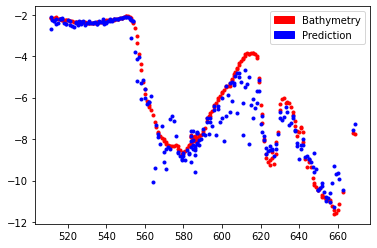

In [227]:
plt.plot(df_transect['x'],-df_transect['z'], 'r.', df_transect['x'],-df_transect['z_pred'], 'b.')
red = mpatches.Patch(color='red', label='Bathymetry')
blue = mpatches.Patch(color='blue', label='Prediction')
plt.legend(handles=[red,blue])
plt.show()

In [223]:
df_transect['dif'] = df_transect['z'] - df_transect['z_pred']

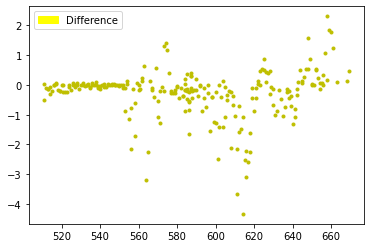

In [229]:
#plt.plot(df_transect['x'],df_transect['dif'], 'y.', df_transect['x'],df_transect['cspmb7'], 'g.')
plt.plot(df_transect['x'],df_transect['dif'], 'y.')
yellow = mpatches.Patch(color='yellow', label='Difference')
plt.legend(handles=[yellow])
#green = mpatches.Patch(color='green', label='Cspm')
#plt.legend(handles=[yellow,green])
plt.show()
